In [2]:
import csv
import re

with open("A1_dataset.csv", encoding="utf8", newline='') as file:
    data = csv.reader(file)
    next(data)
    data_list = list(data)

In [3]:
negative_sent = []
positive_sent = []

for line in data_list:
    if line[0][0] == "0":
        negative_sent.append(line)

    else:
        positive_sent.append(line)

## QUESTION 1

### PART A


Regex used for tokenization = ((https?|www).+\w+|[@]?\w+|(\.+)|[^\w\s])

The above regex considers it as a token if one of the following coniditon is matched
1. Starts with an http,www,https (handles urls)
2. Is a word, can start with '@' (counts usernames as single tokens)
3. Any character other than above specified

In [4]:
reg_exp = r"((https?|www).+\w+\.([\w])+[^\s]+)|[@]?\w+|(\.+)|[^\w\s]"

total_negative_tokens = 0
total_positive_tokens = 0

unique_negative_tokens = set()
unique_positive_tokens = set()

for tweet in negative_sent:
    tokens = re.finditer(reg_exp, tweet[2], re.MULTILINE)
    tokens_list = list(tokens)

    for match in tokens_list:
        unique_negative_tokens.add(match.group())

    total_negative_tokens += len(tokens_list)
	

for tweet in positive_sent:
    tokens = re.finditer(reg_exp, tweet[2], re.MULTILINE)
    tokens_list = list(tokens)

    for match in tokens_list:
        unique_positive_tokens.add(match.group())

    total_positive_tokens += len(tokens_list)

average_negative_tokens = total_negative_tokens/len(negative_sent)
average_positive_tokens = total_positive_tokens/len(positive_sent)


print(f"Average tokens in negative tweets = {average_negative_tokens} tokens/tweet")
print(f"Average tokens in positive tweets = {average_positive_tokens} tokens/tweet")


Average tokens in negative tweets = 16.588 tokens/tweet
Average tokens in positive tweets = 16.06077831219939 tokens/tweet


Regex for sentences = "[^.!?\s][^.!?\n]*(https?|www.+\w+|[@]?\w+|\.+|[^\w\s]*)"

In [5]:
reg_exp = r'[^.!?\s][^.!?\n]*(https?|www.+\w+|[@]?\w+|\.+|[^\w\s]*)+'

total_negative_sentences = 0
total_positive_sentences = 0

positive_sentences = []
negative_sentences = []

for tweet in negative_sent:
    sentences = re.finditer(reg_exp, tweet[2])
    sentences_list = list(sentences)
    total_negative_sentences += len(sentences_list)
    
    for sent in sentences_list:
        negative_sentences.append(sent.group())

for tweet in positive_sent:
    sentences = re.finditer(reg_exp, tweet[2])
    sentences_list = list(sentences)
    total_positive_sentences += len(sentences_list)
    
    for sent in sentences_list:
        positive_sentences.append(sent.group())

average_negative_sentences = total_negative_sentences/len(negative_sent)
average_positive_sentences = total_positive_sentences/len(positive_sent)

print(f"Average sentences in negative tweets = {average_negative_sentences} sentences/tweet")
print(f"Average sentences in positive tweets = {average_positive_sentences} sentences/tweet")

Average sentences in negative tweets = 1.8145 sentences/tweet
Average sentences in positive tweets = 1.889811980760822 sentences/tweet


In [6]:
# reg = "r'\b(?<!-)[aeiouAEIOU][-\w']*(?!@)\b'"
words_v_n = 0 #No of words starting with a vowel in negative class
words_c_n = 0 #No of words starting with a consonant in negative class
words_v_p = 0 #No of words starting with a vowel in positive class
words_c_p = 0 #No of words starting with a consonant in positive class

for i in range(len(negative_sent)): #No of words starting with a vowel in negative class
    tokens = re.findall(r"\b(?<![-@])[aeiouAEIOU][-a-zA-Z']*(?!@)\b", negative_sent[i][2])
    words_v_n += len(tokens)

for i in range(len(positive_sent)): #No of words starting with a vowel in positive class
    tokens = re.findall(r"\b(?<![-@])[aeiouAEIOU][-a-zA-Z']*(?!@)\b", positive_sent[i][2])
    words_v_p += len(tokens)
    
for i in range(len(negative_sent)): #No of words starting with a consonant in negative class
    tokens = re.findall(r"\b(?<![-@.'])[^-\saeiouAEIOU@.//:'\\)\d][-a-zA-Z']*(?!.com)\b", negative_sent[i][2])
    words_c_n += len(tokens)
    # print(tokens)

for i in range(len(positive_sent)): #No of words starting with a consonant in positive class
    tokens = re.findall(r"\b(?<![-@.'])[^-\saeiouAEIOU@.:'\\//)d][-a-zA-Z']*(?!.com)\b", positive_sent[i][2])
    words_c_p += len(tokens)
    # print(tokens)

print("No of words starting with a vowel in negative class = " , words_v_n)
print("No of words starting with a vowel in positive class = ", words_v_p)

print("No of words starting with a consonant in negative class = ", words_c_n)
print("No of words starting with a consonant in positive class = ", words_c_p)



No of words starting with a vowel in negative class =  6867
No of words starting with a vowel in positive class =  7010
No of words starting with a consonant in negative class =  19039
No of words starting with a consonant in positive class =  20245


## Lower casing all the text

In [7]:
def lower_text(result):
    return result.group(0).lower()

negative_pre = []
positive_pre = []

for tweet in negative_sent:
    new_text = re.sub("[A-Z]", lower_text, tweet[2])
    negative_pre.append([tweet[0],tweet[1], new_text])

for tweet in positive_sent:
    new_text = re.sub("[A-Z]", lower_text, tweet[2])
    positive_pre.append([tweet[0],tweet[1], new_text])



reg_exp = r"((https?|www).+\w+\.([\w])+[^\s]+)|[@]?\w+|(\.+)|[^\w\s]"

unique_negative_tokens_after_lowercase = set()
unique_positive_tokens_after_lowercase = set()

for i in range(len(negative_pre)):
    tokens = re.finditer(reg_exp, negative_pre[i][2], re.MULTILINE)
    tokens_list = list(tokens)

    for match in tokens_list:
        unique_negative_tokens_after_lowercase.add(match.group())

for i in range(len(positive_pre)):
    tokens = re.finditer(reg_exp, positive_pre[i][2], re.MULTILINE)
    tokens_list = list(tokens)

    for match in tokens_list:
        unique_positive_tokens_after_lowercase.add(match.group())

print("Negatives")
print("Unique tokens before lowercase = ", len(unique_negative_tokens))
print("Unique tokens after lowercase = ", len(unique_negative_tokens_after_lowercase))

print("Positives")
print("Unique tokens before lowercase = ", len(unique_positive_tokens))
print("Unique tokens after lowercase = ", len(unique_positive_tokens_after_lowercase))


Negatives
Unique tokens before lowercase =  6448
Unique tokens after lowercase =  5655
Positives
Unique tokens before lowercase =  7900
Unique tokens after lowercase =  6875


## Counting and listing all usernames

In [8]:
reg_exp = "[@]\w+"

total_usernames_in_negative = 0
total_usernames_in_positive = 0

usernames_in_negative = []
usernames_in_positive = []

for tweet in negative_sent:
    usernames = re.findall(reg_exp, tweet[2])
    
    if len(usernames) != 0:

        total_usernames_in_negative += len(usernames)

        for user in usernames:
            usernames_in_negative.append(user)


for tweet in positive_sent:
    usernames = re.findall(reg_exp, tweet[2])
    
    if len(usernames) != 0:

        total_usernames_in_positive += len(usernames)

        for user in usernames:
            usernames_in_positive.append(user)

print("Total usernames in negative: ", total_usernames_in_negative)
#print(usernames_in_negative)

print("Total usernames in positive: ",total_usernames_in_positive)
#print(usernames_in_positive)

Total usernames in negative:  803
Total usernames in positive:  1305


## Counting and listing all the URLs

In [9]:
reg_exp = "((https?|www[\.][^\.\s])[^\s]+)"

total_url_in_negative = 0
total_url_in_positive = 0

urls_in_negative = []
urls_in_positive = []

for tweet in negative_sent:
    urls = re.findall(reg_exp, tweet[2])
    
    if len(urls) != 0:
        total_url_in_negative += len(urls)
        for i in urls:
            urls_in_negative.append(i[0])

for tweet in positive_sent:
    urls = re.findall(reg_exp, tweet[2])
    
    if len(urls) != 0:
        total_url_in_positive += len(urls)
        for i in urls:
            urls_in_positive.append(i[0])

print("Total URLs in negative: ", total_url_in_negative)
#print(urls_in_negative)

print("Total URLs in positive: ",total_url_in_positive)
#print(urls_in_positive)

Total URLs in negative:  60
Total URLs in positive:  136


## Number of tweets for each day of week

In [10]:

negative_sent_days = {'Mon':0, 'Tue':0, 'Wed':0, 'Thu':0, 'Fri':0, 'Sat':0, 'Sun':0}
positive_sent_days = {'Mon':0, 'Tue':0, 'Wed':0, 'Thu':0, 'Fri':0, 'Sat':0, 'Sun':0}

for tweet in negative_sent:

    all_matches = re.finditer("^Mon|Tue|Wed|Thu|Fri|Sat|Sun", tweet[1])
    for match in list(all_matches):
        negative_sent_days[match.group()] += 1

for tweet in positive_sent:

    all_matches = re.finditer("^Mon|Tue|Wed|Thu|Fri|Sat|Sun", tweet[1])
    for match in list(all_matches):
        positive_sent_days[match.group()] += 1

print("For negative tweets")
print(negative_sent_days)

print("For positive tweets")
print(positive_sent_days)

For negative tweets
{'Mon': 391, 'Tue': 154, 'Wed': 127, 'Thu': 171, 'Fri': 473, 'Sat': 119, 'Sun': 565}
For positive tweets
{'Mon': 481, 'Tue': 132, 'Wed': 172, 'Thu': 50, 'Fri': 391, 'Sat': 298, 'Sun': 763}


# Part B

In [11]:
word = input("Enter a word: ")
class_label = input("Enter class label: ")

reg_exp = f"{word}"

sentences_with_words = []
tweets_with_words = []
number_of_occurances = 0

if class_label == "0":
    for tweet in negative_sent:
        match = list(re.finditer(reg_exp, tweet[2]))
        
        if len(match) > 0:
            for elem in match:
                number_of_occurances += 1
                tweets_with_words.append(tweet[2])

    for tweet in negative_sentences:
        match = list(re.finditer(reg_exp, tweet))
        
        if len(match) > 0:
            for elem in match:
                sentences_with_words.append(tweet)
    
else:
    for tweet in positive_sent:
        match = list(re.finditer(reg_exp, tweet[2]))
        
        if len(match) > 0:
            for elem in match:
                number_of_occurances += 1
                tweets_with_words.append(tweet[2])
    for tweet in positive_sentences:
        match = list(re.finditer(reg_exp, tweet))
        
        if len(match) > 0:
            for elem in match:
                sentences_with_words.append(tweet)
    
#print(tweets_with_words)
#print(sentences_with_words)
print("Total number of occurances = " ,number_of_occurances)


Total number of occurances =  170689


In [12]:
reg_exp = f"^{word}"
number_of_occurances_in_start = 0

if class_label == "0":

    for tweet in negative_sentences:
        match = list(re.finditer(reg_exp, tweet))
        
        if len(match) > 0:
            for elem in match:
                number_of_occurances_in_start += 1

else:

    for tweet in positive_sentences:
        match = list(re.finditer(reg_exp, tweet))
        
        if len(match) > 0:
            for elem in match:
                number_of_occurances_in_start += 1
                
print("Total number of occurances in the beginning = " ,number_of_occurances_in_start)

Total number of occurances in the beginning =  4322


In [13]:
reg_exp = f"{word}$"
number_of_occurances_in_end = 0

if class_label == "0":

    for tweet in negative_sentences:
        match = list(re.finditer(reg_exp, tweet))
        
        if len(match) > 0:
            for elem in match:
                number_of_occurances_in_end += 1

else:

    for tweet in positive_sentences:
        match = list(re.finditer(reg_exp, tweet))
        
        if len(match) > 0:
            for elem in match:
                number_of_occurances_in_end += 1
                
print("Total number of occurances in the beginning = " ,number_of_occurances_in_end)

Total number of occurances in the beginning =  4322


## QUESTION 2

### Remove URLs

In [14]:
reg_exp = "((https?|www[\.][^\.\s])[^\s]+)"

for i in range(len(negative_sent)): #Remove URLs
    x = re.sub(reg_exp, "", negative_pre[i][2])
    negative_pre[i][2] = x
  
for i in range(len(positive_sent)): #Remove URLs
    x = re.sub(reg_exp, "", positive_pre[i][2])
    positive_pre[i][2] = x  

 

### Remove Usernames

In [15]:
reg_exp = "[@]\w+"

for i in range(len(negative_sent)): #Remove Usernames
    x = re.sub(reg_exp, "", negative_pre[i][2])
    negative_pre[i][2] = x
    
for i in range(len(positive_sent)): #Remove Usernames
    x = re.sub(reg_exp, "", positive_pre[i][2])
    positive_pre[i][2] = x

### Remove Punctuations and Special Characters

In [16]:
reg_exp = "&quot|&gt|&amp|&lt"
reg_exp2 = "[^a-zA-Z0-9\s]"

for i in range(len(negative_sent)): 
    x = re.sub(reg_exp, "", negative_pre[i][2])
    x = re.sub(reg_exp2, " ", x) 
    negative_pre[i][2] = x
    
for i in range(len(positive_sent)): 
    x = re.sub(reg_exp, "", positive_pre[i][2])
    x = re.sub(reg_exp2, " ", x) 
    positive_pre[i][2] = x
    

### Remove Numbers and Words Containing Numbers

In [17]:
reg_exp = r"\b\w*\d\w*\b"

for i in range(len(negative_sent)): 
    x = re.sub(reg_exp, " ", negative_pre[i][2])
    negative_pre[i][2] = x
    
for i in range(len(positive_sent)): 
    x = re.sub(reg_exp, " ", positive_pre[i][2])
    positive_pre[i][2] = x

### Remove Stopwords

In [18]:
import nltk

from nltk.corpus import stopwords

stop_words = list(stopwords.words('english'))
extra_stop_words = ["u","ur","uk","go","x","xxx","l","r","b","c","d","e","f","g","h","j","k","m","n","o","p","q","v","w","y","z","im","imi"]
stop_words = stop_words + extra_stop_words


reg_exp = r"\b(" + r"|".join(stop_words) + r")\b"

for i in range(len(negative_sent)): 
    x = re.sub(reg_exp, " ", negative_pre[i][2])
    negative_pre[i][2] = x
    # print(x)
    
for i in range(len(positive_sent)): 
    x = re.sub(reg_exp, " ", positive_pre[i][2])
    positive_pre[i][2] = x
    # print(x)

### Remove Space

In [19]:
reg_exp = "\s\s+"

for i in range(len(negative_sent)): 
    x = re.sub(reg_exp, " ", negative_pre[i][2])
    negative_pre[i][2] = x
    
for i in range(len(positive_sent)): 
    x = re.sub(reg_exp, " ", positive_pre[i][2])
    positive_pre[i][2] = x

### Tokenisation

In [20]:
for i in range(len(negative_sent)): 
    x = negative_pre[i][2].split()
    negative_pre[i][2] = x
    # print(x)
    
for i in range(len(positive_sent)): 
    x = positive_pre[i][2].split()
    positive_pre[i][2] = x
    # print(x)

### Spelling Correction

In [21]:
from nltk.metrics.distance import jaccard_distance
from nltk.util import ngrams
nltk.download('words')
from nltk.corpus import words

correct_words = words.words()

for i in range(len(negative_pre)):
    for j in range(len(negative_pre[i][2])):
        word = negative_pre[i][2][j]
        temp = [(jaccard_distance(set(ngrams(word, 2)),set(ngrams(w, 2))),w)
                for w in correct_words if w[0]==word[0]]
        # print(sorted(temp, key = lambda val:val[0])[0][1])
        negative_pre[i][2][j] = sorted(temp, key = lambda val:val[0])[0][1]


for i in range(len(positive_pre)):
    for j in range(len(positive_pre[i][2])):
        word = positive_pre[i][2][j]
        temp = [(jaccard_distance(set(ngrams(word, 2)),set(ngrams(w, 2))),w)
                for w in correct_words if w[0]==word[0]]
        # print(sorted(temp, key = lambda val:val[0])[0][1])
        positive_pre[i][2][j] = sorted(temp, key = lambda val:val[0])[0][1]
        

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\charv\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


### Lemmatization

In [22]:
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

for i in range(len(negative_pre)):
    for j in range(len(negative_pre[i][2])):
        word = negative_pre[i][2][j]
        word = lem.lemmatize(word, wordnet.VERB)
        negative_pre[i][2][j] = word
        # print(word) 
        
for i in range(len(positive_pre)):
    for j in range(len(positive_pre[i][2])):
        word = positive_pre[i][2][j]
        word = lem.lemmatize(word, wordnet.VERB)
        positive_pre[i][2][j] = word
        # print(word) 
        
# print(negative_pre)
# print(positive_pre)

## QUESTION 3

### WORDCLOUD

In [23]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


### WORD CLOUD - NEGATIVE CLASS 

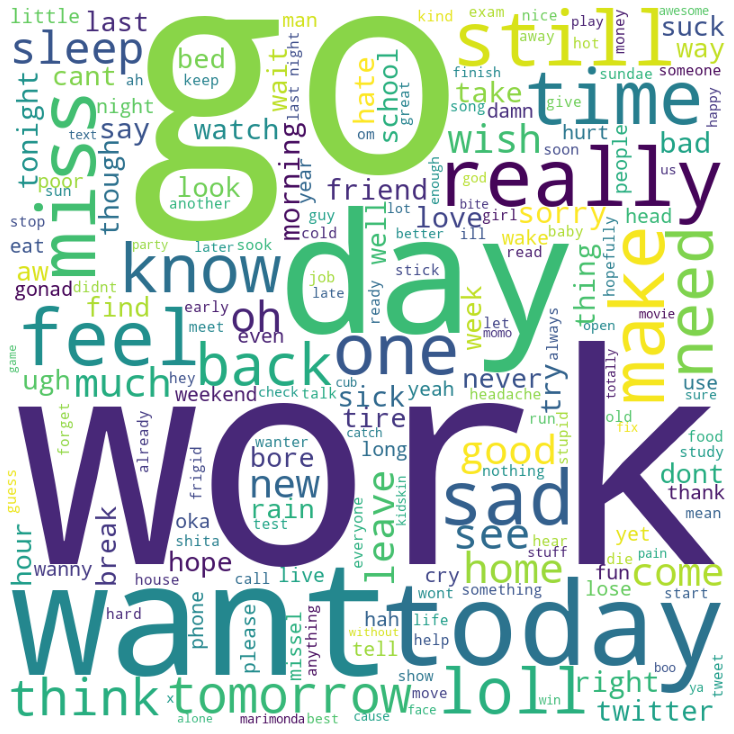

In [25]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

negative_word_string = ""


for tweet in negative_pre:
    negative_word_string = negative_word_string + " ".join(tweet[2]) + " "
stopwords_wc = set(STOPWORDS)       

wordcloud = WordCloud(width = 800, height = 800, background_color ='white',min_font_size = 10).generate(negative_word_string)

plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### WORD CLOUD - POSITIVE CLASS

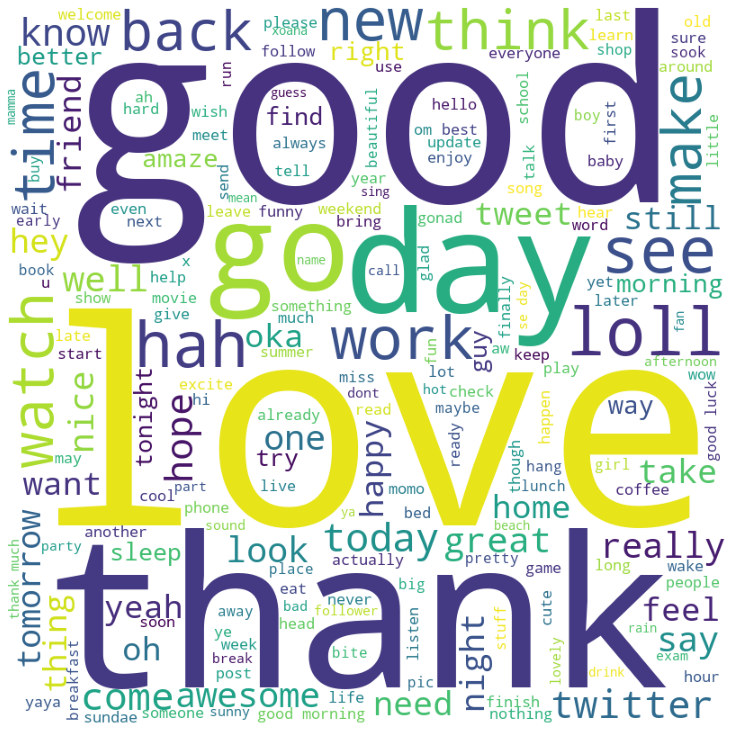

In [26]:
positive_word_string = ""

for tweet in positive_pre:
    positive_word_string = positive_word_string + " ".join(tweet[2]) + " "
# stopwords_wc = set(STOPWORDS)
   
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords= stopwords_wc, min_font_size = 10).generate(positive_word_string)
                     
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

 
plt.show()

## QUESTION 4

### SENTIMENT ANALYSIS

In [27]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

final_list_negative = []
final_list_positive = []

sentiment_analyzer_object = SentimentIntensityAnalyzer()
    
for i in range(len(negative_pre)):
    curr_sent = " ".join(negative_pre[i][2])

    sentiment = sentiment_analyzer_object.polarity_scores(curr_sent)

    if sentiment['compound'] >= 0.05:
        negative_pre[i].append("1")
    elif sentiment['compound'] <= -0.05:
        negative_pre[i].append("0")
    else:
        negative_pre[i].append("2")

for i in range(len(positive_pre)):
    curr_sent = " ".join(positive_pre[i][2])

    sentiment = sentiment_analyzer_object.polarity_scores(curr_sent)

    if sentiment['compound'] >= 0.05:
        positive_pre[i].append("1")
    elif sentiment['compound'] <= -0.05:
        positive_pre[i].append("0")
    else:
        positive_pre[i].append("2")

for i in range(len(data_list)):
    curr_sent = data_list[i][2]

    sentiment = sentiment_analyzer_object.polarity_scores(curr_sent)

    if sentiment['compound'] >= 0.05:
        data_list[i].append("1")
    elif sentiment['compound'] <= -0.05:
        data_list[i].append("0")
    else:
        data_list[i].append("2")
        
# print(negative_pre)

### ACCURACY (Discarding neutral)

In [28]:
accurate_total_pre = 0
accurate_total_raw = 0

for tweet in negative_pre:
    if(tweet[0] == tweet[3]):
        accurate_total_pre+=1
for tweet in positive_pre:
    if(tweet[0] == tweet[3]):
        accurate_total_pre+=1
        
for tweet in data_list:
    if(tweet[0] == tweet[3]):
        accurate_total_raw+=1
        
accuracy_pre = accurate_total_pre / (len(negative_pre)+len(positive_pre))
accuracy_raw = accurate_total_raw/len(data_list)

print("Accuracy of preprocessed data =", accuracy_pre)
print("Accuracy of raw data =", accuracy_raw)

Accuracy of preprocessed data = 0.5019827385117798
Accuracy of raw data = 0.5360391882435269


### ACCURACY (Neutral is positive)

In [29]:
accurate_total_pre_neutral_is_positive = 0
accurate_total_raw_neutral_is_positive = 0

for tweet in negative_pre:
    if(tweet[0] == tweet[3]):
        accurate_total_pre_neutral_is_positive+=1
for tweet in positive_pre:
    if(tweet[0] == tweet[3] or tweet[3] == "2"):
        accurate_total_pre_neutral_is_positive+=1
        
for tweet in data_list:
    if(tweet[0] == tweet[3] or (tweet[3] == "2" and tweet[0] == "1")):
        accurate_total_raw_neutral_is_positive+=1
        
accuracy_pre = accurate_total_pre_neutral_is_positive / (len(negative_pre)+len(positive_pre))
accuracy_raw = accurate_total_raw_neutral_is_positive/len(data_list)

print("Accuracy of preprocessed data =", accuracy_pre)
print("Accuracy of raw data =", accuracy_raw)

Accuracy of preprocessed data = 0.6540704455330068
Accuracy of raw data = 0.6846279449498484


### ACCURACY (Neutral is negative)

In [30]:
accurate_total_pre_neutral_is_negative = 0
accurate_total_raw_neutral_is_negative = 0

for tweet in negative_pre:
    if(tweet[0] == tweet[3] or tweet[3] == "2"):
        accurate_total_pre_neutral_is_negative+=1
for tweet in positive_pre:
    if(tweet[0] == tweet[3]):
        accurate_total_pre_neutral_is_negative+=1
        
for tweet in data_list:
    if(tweet[0] == tweet[3] or (tweet[3] == "2" and tweet[0] == "0")):
        accurate_total_raw_neutral_is_negative+=1
        
accuracy_pre = accurate_total_pre_neutral_is_negative / (len(negative_pre)+len(positive_pre))
accuracy_raw = accurate_total_raw_neutral_is_negative/len(data_list)

print("Accuracy of preprocessed data =", accuracy_pre)
print("Accuracy of raw data =", accuracy_raw)

Accuracy of preprocessed data = 0.6384418007930954
Accuracy of raw data = 0.6540704455330068
